In [29]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm

from tueplots import bundles
from tueplots.constants.color.palettes import rgb


read_path = r'C:\Users\Julia\Documents\Uni\Master\1\Data-Literacy\Data-Literacy\Data\joined_survey_article_standardized_median.csv'
df = pd.read_csv(read_path, delimiter=';', header=0)
df["date"] = pd.to_datetime(df["date"], format="%d.%m.%Y")
df["SPD"] = pd.to_numeric(df["SPD"], errors='coerce')
df["Union"] = pd.to_numeric(df["Union"], errors='coerce')
df["Grüne"] = pd.to_numeric(df["Grüne"], errors='coerce')
df["FDP"] = pd.to_numeric(df["FDP"], errors='coerce')
df["AfD"] = pd.to_numeric(df["AfD"], errors='coerce')
df["Linke"] = pd.to_numeric(df["Linke"], errors='coerce')

In [30]:
# party to analyse
party = 'Grüne'

In [31]:
# Iraq war
this_df = df[(df['date'].dt.year >= 2002) & (df['date'].dt.year <= 2004)]

# ukraine war
#this_df = df[(df['date'].dt.year >= 2022)]

high_values = this_df[this_df['standardized_war_articles'] >= 0.2]
first = high_values['date'].iloc[-1]
last = high_values['date'].iloc[0]


In [32]:
# training 
data_before_war = df[(df['date'] <= first) & (~df[party].isna())]
X_train = data_before_war.index.values.reshape(-1,1)

polynomial_features= PolynomialFeatures(degree=3)
X_train_poly = polynomial_features.fit_transform(X_train)
y_train = data_before_war[party]


In [33]:
# testing
data_war = df[(df['date'] >= first) & (df['date'] <= last)]

X_test = data_war.index.values.reshape(-1,1)
polynomial_features= PolynomialFeatures(degree=3)
X_test_poly = polynomial_features.fit_transform(X_test)
y_test = data_war[party]

In [34]:
model = sm.OLS(y_train, X_train_poly).fit()
y_train_pred = model.predict(X_train_poly) 

In [35]:
y_test_pred = model.predict(X_test_poly) 

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


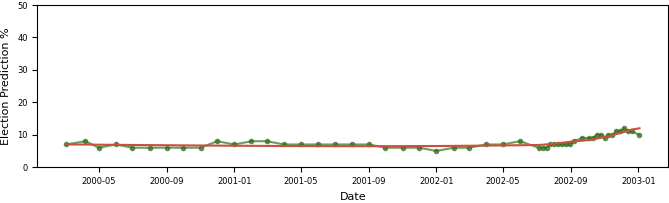

In [36]:
# plot
plt.rcParams.update(bundles.icml2022(column='full', nrows=1, ncols=2, usetex=False))
fig, ax1 = plt.subplots()
ax1.set_ylim([0, 50])
ax1.set_xlabel('Date') 
ax1.set_ylabel('Election Prediction %')
ax1.plot(data_before_war['date'], data_before_war[party], marker='.', linestyle='-',label=party, color=rgb.tue_darkgreen, alpha=0.7)
ax1.plot(data_before_war['date'],y_train_pred, color = rgb.tue_ocre)

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


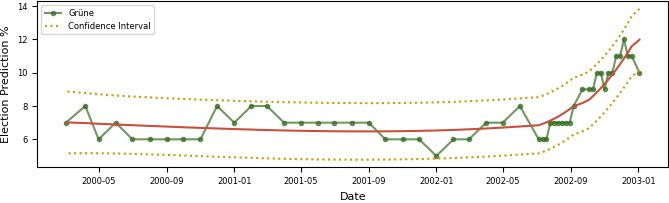

In [37]:
# plot with confidence interval
from statsmodels.sandbox.regression.predstd import wls_prediction_std
_, upper,lower = wls_prediction_std(model)

fig, ax1 = plt.subplots()
ax1.set_xlabel('Date') 
ax1.set_ylabel('Election Prediction %')
ax1.plot(data_before_war['date'], data_before_war[party], marker='.', linestyle='-',label=party, color=rgb.tue_darkgreen, alpha=0.7)
ax1.plot(data_before_war['date'],y_train_pred, color = rgb.tue_ocre)
ax1.plot(data_before_war['date'],upper,':',label="Confidence Interval", color = rgb.tue_orange) # confid. intrvl
ax1.plot(data_before_war['date'],lower,':', color = rgb.tue_orange)
ax1.legend(loc='upper left')

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


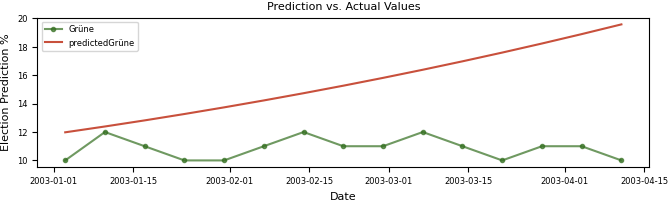

In [38]:
# predicted vs actual values
from statsmodels.sandbox.regression.predstd import wls_prediction_std
_, upper,lower = wls_prediction_std(model)

fig, ax1 = plt.subplots()
ax1.set_xlabel('Date') 
ax1.set_ylabel('Election Prediction %')
ax1.plot(data_war['date'], data_war[party], marker='.', linestyle='-',label=party, color=rgb.tue_darkgreen, alpha=0.7)
ax1.plot(data_war['date'],y_test_pred, label = "predicted" + party, color = rgb.tue_ocre)
ax1.set_title("Prediction vs. Actual Values")
#ax1.plot(data_war['date'],upper,'--',label="Upper") # confid. intrvl
#ax1.plot(data_war['date'],lower,':',label="lower")
ax1.legend(loc='upper left')

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


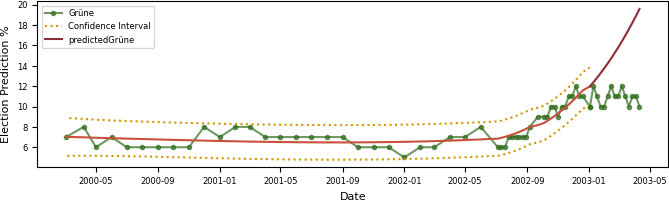

In [39]:
# plot with confidence interval
from statsmodels.sandbox.regression.predstd import wls_prediction_std
_, upper,lower = wls_prediction_std(model)

fig, ax1 = plt.subplots()
ax1.set_xlabel('Date') 
ax1.set_ylabel('Election Prediction %')
ax1.plot(data_before_war['date'], data_before_war[party], marker='.', linestyle='-',label=party, color=rgb.tue_darkgreen, alpha=0.7)


ax1.plot(data_before_war['date'],y_train_pred, color = rgb.tue_ocre)
ax1.plot(data_before_war['date'],upper,':',label="Confidence Interval", color = rgb.tue_orange) # confid. intrvl
ax1.plot(data_before_war['date'],lower,':', color = rgb.tue_orange)


ax1.plot(data_war['date'], data_war[party], marker='.', linestyle='-', color=rgb.tue_darkgreen, alpha=0.7)
ax1.plot(data_war['date'],y_test_pred, color = rgb.tue_red, label = 'predicted' + party)

#ax1.vlines(first, ymin=0, ymax = 20, colors="grey")
ax1.legend(loc='upper left')

In [40]:
# how accurate is the model? 
# wird bisher falsch berechnet ??
from sklearn.metrics import r2_score
score = r2_score(y_test.values, y_test_pred)
print("The accuracy of our model is {}%".format(round(score, 2) *100))
from sklearn.metrics import mean_absolute_error
score = mean_absolute_error(y_test.values, y_test_pred)
print("The Mean Absolute Error of our Model is {}".format(round(score, 2)))
from sklearn.metrics import mean_squared_error
import numpy as np
score = np.sqrt(mean_absolute_error(y_test.values, y_test_pred))
print("The Mean Absolute Error of our Model is {}".format(round(score, 2)))

The accuracy of our model is -5211.0%
The Mean Absolute Error of our Model is 4.6
The Mean Absolute Error of our Model is 2.14


In [41]:
# how accurate is the model? 
# wird bisher falsch berechnet
from sklearn.metrics import r2_score
score = r2_score(y_train.values, y_train_pred)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

from sklearn.metrics import mean_absolute_error
score = mean_absolute_error(y_train.values, y_train_pred)
print("The Mean Absolute Error of our Model is {}".format(round(score, 2)))
from sklearn.metrics import mean_squared_error
import numpy as np
score = np.sqrt(mean_absolute_error(y_train.values, y_train_pred))
print("The Mean Absolute Error of our Model is {}".format(round(score, 2)))

The accuracy of our model is 79.0%
The Mean Absolute Error of our Model is 0.68
The Mean Absolute Error of our Model is 0.82


findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


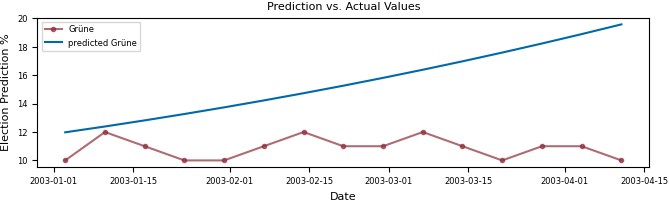

In [42]:
## Example tueplots
# its not saving as a pdf..

# predicted vs actual values
from statsmodels.sandbox.regression.predstd import wls_prediction_std
_, upper,lower = wls_prediction_std(model)

from tueplots import bundles
# # this provides the color palette of Uni Tuebingen
from tueplots.constants.color.palettes import rgb
# # e.g. as rgb.tue_blue, rgb.tue_red, etc.
# # set plotting stylesheet
#half of page
#plt.rcParams.update(bundles.icml2022(column='half', nrows=1, ncols=1, usetex=False))
# full page
plt.rcParams.update(bundles.icml2022(column='full', nrows=1, ncols=2, usetex=False))

# plotting code goes here
fig, ax1 = plt.subplots()
ax1.set_xlabel('Date') 
ax1.set_ylabel('Election Prediction %')
ax1.plot(data_war['date'], data_war[party], marker='.', linestyle='-',label=party, color=rgb.tue_red, alpha=0.7)
ax1.plot(data_war['date'],y_test_pred, label = "predicted " + party, color = rgb.tue_blue)
ax1.set_title("Prediction vs. Actual Values")
ax1.legend(loc='upper left')

plt.savefig('your_plot.pdf', format='pdf')

plt.show()
# this file can now by used as \includegraphics{filename}
